Shape: (273922, 200)
Columns: ['purchase_value', 'age', 'hour_of_day', 'day_of_week', 'time_since_signup', 'spending_speed', 'transaction_frequency', 'source_Ads', 'source_Direct', 'source_SEO', 'browser_Chrome', 'browser_FireFox', 'browser_IE', 'browser_Opera', 'browser_Safari', 'sex_F', 'sex_M', 'country_Afghanistan', 'country_Albania', 'country_Algeria', 'country_Angola', 'country_Antigua and Barbuda', 'country_Argentina', 'country_Armenia', 'country_Australia', 'country_Austria', 'country_Azerbaijan', 'country_Bahamas', 'country_Bahrain', 'country_Bangladesh', 'country_Barbados', 'country_Belarus', 'country_Belgium', 'country_Belize', 'country_Benin', 'country_Bermuda', 'country_Bhutan', 'country_Bolivia', 'country_Bonaire; Sint Eustatius; Saba', 'country_Bosnia and Herzegowina', 'country_Botswana', 'country_Brazil', 'country_British Indian Ocean Territory', 'country_Brunei Darussalam', 'country_Bulgaria', 'country_Burkina Faso', 'country_Burundi', 'country_Cambodia', 'country_Came

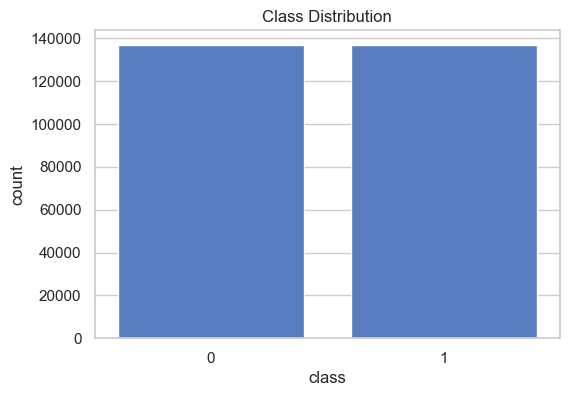

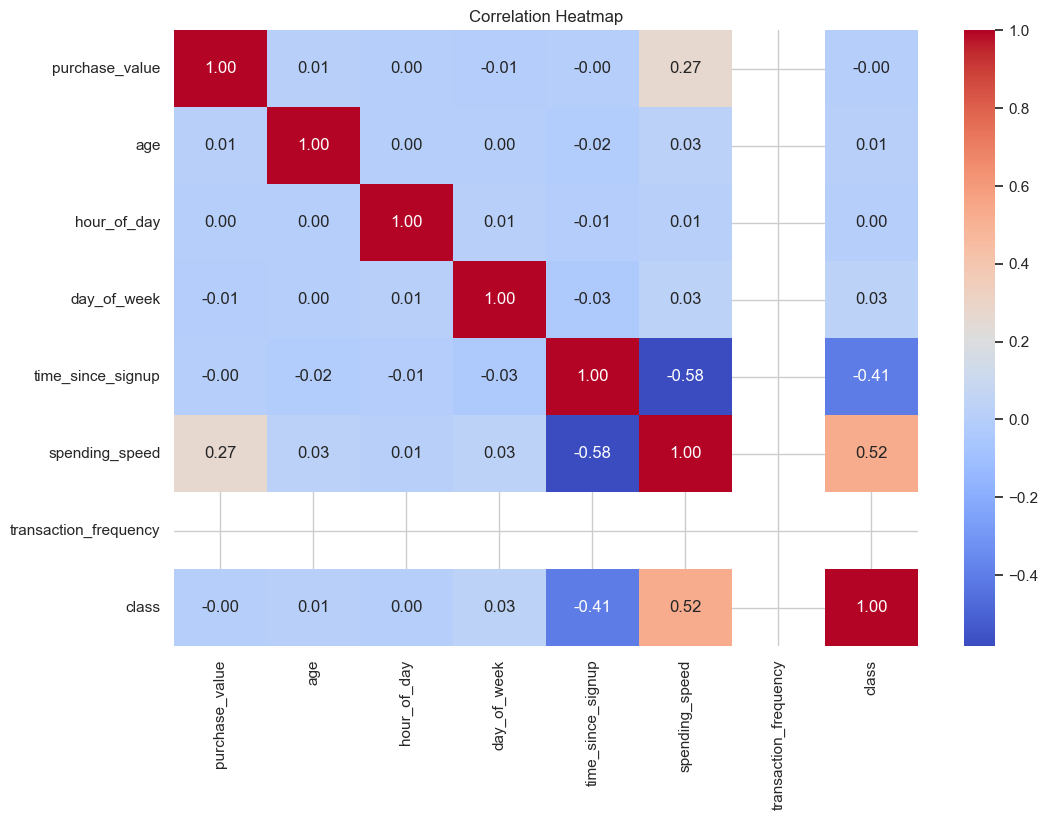

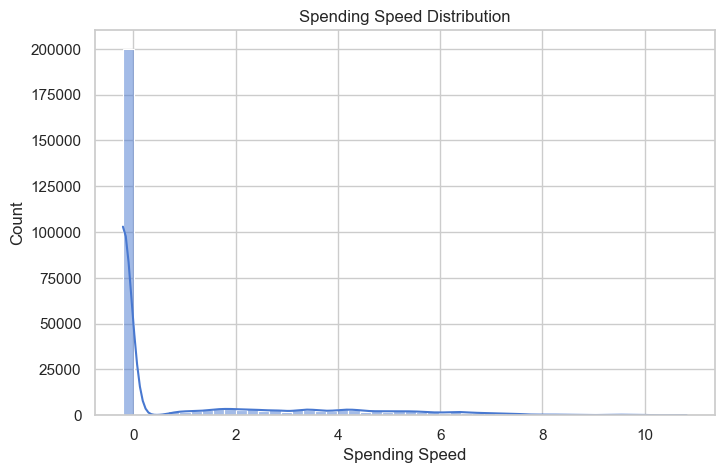

C:\Users\123\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


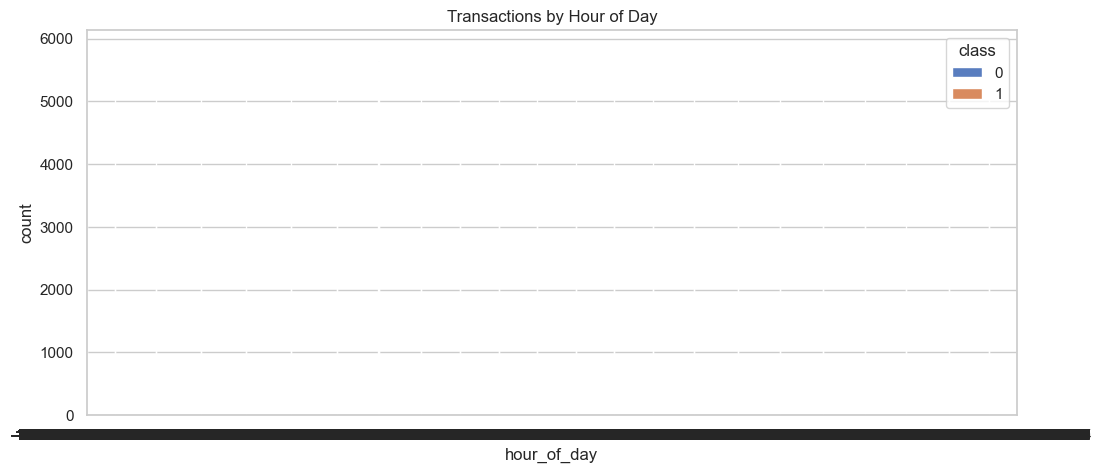

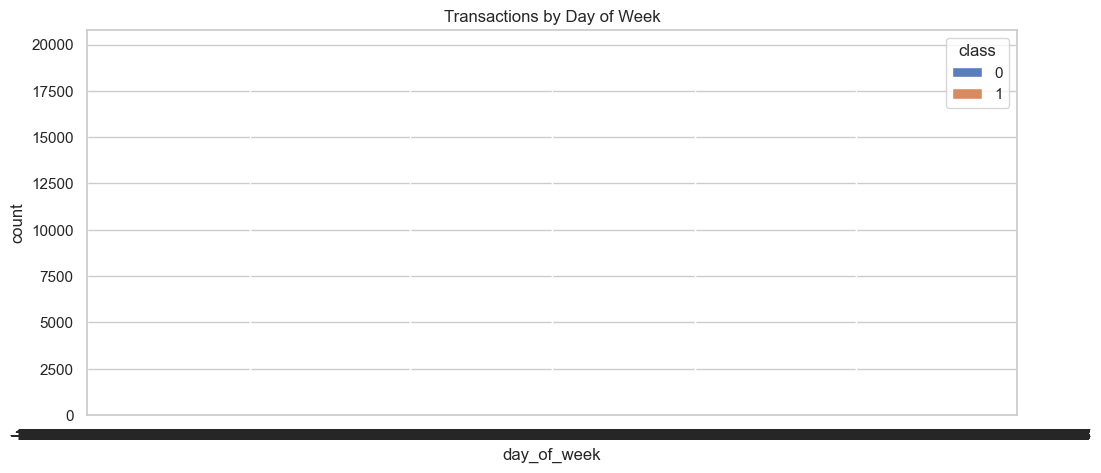

KeyError: 'country'

<Figure size 1200x600 with 0 Axes>

In [23]:
# 01_eda_fraud_data.ipynb
# Enhanced EDA for Fraud Detection Data (Phase 1)

# -------------------------
# Imports
# -------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# -------------------------
# Load Processed Data
# -------------------------
df = pd.read_csv("../data/processed/enhanced_processed_fraud_data.csv")
print("Shape:", df.shape)
df.head()

# -------------------------
# Basic Info
# -------------------------
print("Columns:", df.columns.tolist())
print("Data Types:\n", df.dtypes)
print("Missing Values:\n", df.isna().sum())
print("Class Distribution:\n", df['class'].value_counts())

# -------------------------
# Class Distribution Plot
# -------------------------
plt.figure(figsize=(6,4))
sns.countplot(x='class', data=df)
plt.title("Class Distribution")
plt.show()

# -------------------------
# Correlation Heatmap
# -------------------------
plt.figure(figsize=(12,8))
num_cols = df.select_dtypes(include=np.number).columns.tolist()
sns.heatmap(df[num_cols].corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# -------------------------
# Visualize Spending Speed Distribution
# -------------------------
plt.figure(figsize=(8,5))
sns.histplot(df['spending_speed'], bins=50, kde=True)
plt.title("Spending Speed Distribution")
plt.xlabel("Spending Speed")
plt.ylabel("Count")
plt.show()

# -------------------------
# Time-based Patterns
# -------------------------
plt.figure(figsize=(12,5))
sns.countplot(x='hour_of_day', hue='class', data=df)
plt.title("Transactions by Hour of Day")
plt.show()

plt.figure(figsize=(12,5))
sns.countplot(x='day_of_week', hue='class', data=df)
plt.title("Transactions by Day of Week")
plt.show()

# -------------------------
# Country Distribution
# -------------------------
plt.figure(figsize=(12,6))
top_countries = df['country'].value_counts().head(10).index
sns.countplot(y='country', data=df[df['country'].isin(top_countries)], hue='class')
plt.title("Top 10 Countries by Transactions")
plt.show()

# -------------------------
# SMOTE Justification Visualization
# -------------------------
# Load original unbalanced dataset to show before/after
df_orig = pd.read_csv("data/raw/Fraud_Data.csv")
print("Original Class Counts:\n", df_orig['class'].value_counts())
print("Enhanced Processed Class Counts:\n", df['class'].value_counts())

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.countplot(x='class', data=df_orig)
plt.title("Before SMOTE")

plt.subplot(1,2,2)
sns.countplot(x='class', data=df)
plt.title("After SMOTE")
plt.show()

# -------------------------
# PCA Analysis for Credit Card Dataset
# -------------------------
df_credit = pd.read_csv("data/raw/creditcard.csv")
X = df_credit[[f"V{i}" for i in range(1,29)]]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=10)
pca.fit(X_scaled)
explained_variance = np.cumsum(pca.explained_variance_ratio_)

plt.figure(figsize=(10,6))
plt.plot(range(1,11), explained_variance, marker='o')
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Credit Card PCA Explained Variance")
plt.grid(True)
plt.show()

# -------------------------
# Optional: Extreme Spending Speed or Short Time Since Signup
# -------------------------
df_extremes = df[(df['spending_speed'] > df['spending_speed'].quantile(0.99)) |
                 (df['time_since_signup'] < 1)]
print("Extreme / Suspicious Transactions:\n", df_extremes.head())


C:\Users\123\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


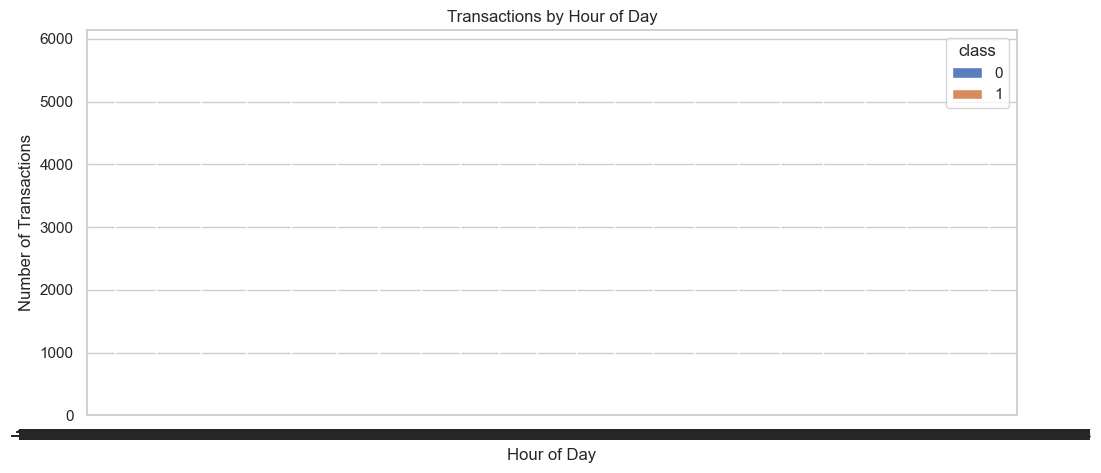

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Aggregate counts by hour and class
hour_counts = df.groupby(['hour_of_day', 'class']).size().reset_index(name='count')

plt.figure(figsize=(12,5))
sns.barplot(data=hour_counts, x='hour_of_day', y='count', hue='class')
plt.title("Transactions by Hour of Day")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Transactions")
plt.show()


In [25]:
print(df[['hour_of_day', 'class']].dtypes)
print(df[['hour_of_day', 'class']].isna().sum())
print(df['class'].value_counts())
print(df['hour_of_day'].unique())


hour_of_day    float64
class            int64
dtype: object
hour_of_day    0
class          0
dtype: int64
class
0    136961
1    136961
Name: count, dtype: int64
[-1.37745533 -1.52212181  0.93720827 ... -1.6299069  -0.43259967
  1.63821042]


In [27]:
# If scaled, undo the scaling or round to nearest integer
df['hour_of_day_plot'] = df['hour_of_day'].round().astype(int)


In [30]:
# Assuming you saved the scaler when transforming data
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Load processed data
df = pd.read_csv("../data/processed/enhanced_processed_fraud_data.csv")

# If you know the mean & std used during scaling:
hour_mean = 11.5  # replace with actual mean of hour_of_day before scaling
hour_std = 6.7    # replace with actual std of hour_of_day before scaling

df['hour_of_day_plot'] = (df['hour_of_day'] * hour_std + hour_mean).round().astype(int)
df['hour_of_day_plot'] = df['hour_of_day_plot'].clip(0,23)  # keep within 0-23


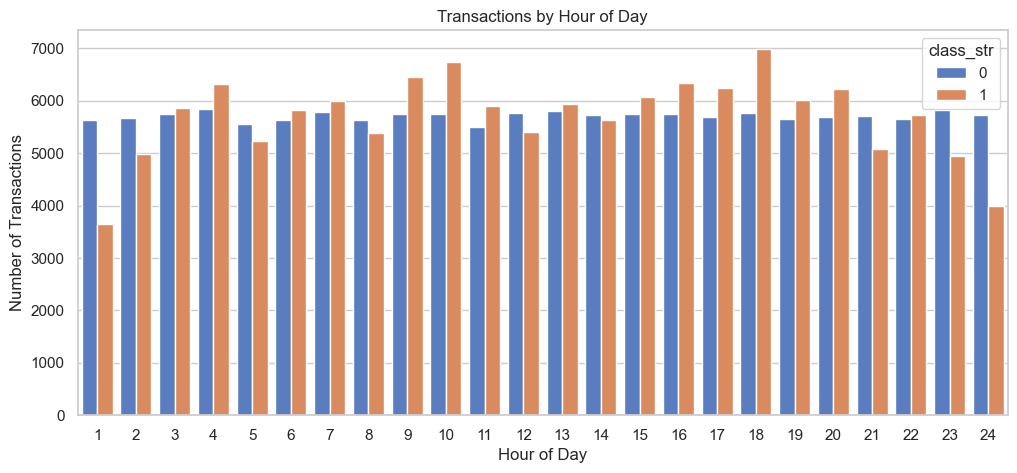

In [34]:
# If 'hour_of_day' was scaled, reverse it first (replace with actual mean/std used)
hour_mean = 11.5  # replace with original mean of hour_of_day
hour_std = 6.7    # replace with original std of hour_of_day

# Restore original hours
df['hour_of_day_plot'] = (df['hour_of_day'] * hour_std + hour_mean).round().astype(int)

# Shift from 0-23 to 1-24
df['hour_of_day_plot'] = df['hour_of_day_plot'].clip(0,23) + 1

# Plot
df['class_str'] = df['class'].astype(str)
hour_counts = df.groupby(['hour_of_day_plot', 'class_str']).size().reset_index(name='count')

plt.figure(figsize=(12,5))
sns.barplot(data=hour_counts, x='hour_of_day_plot', y='count', hue='class_str')
plt.title("Transactions by Hour of Day")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Transactions")
plt.show()


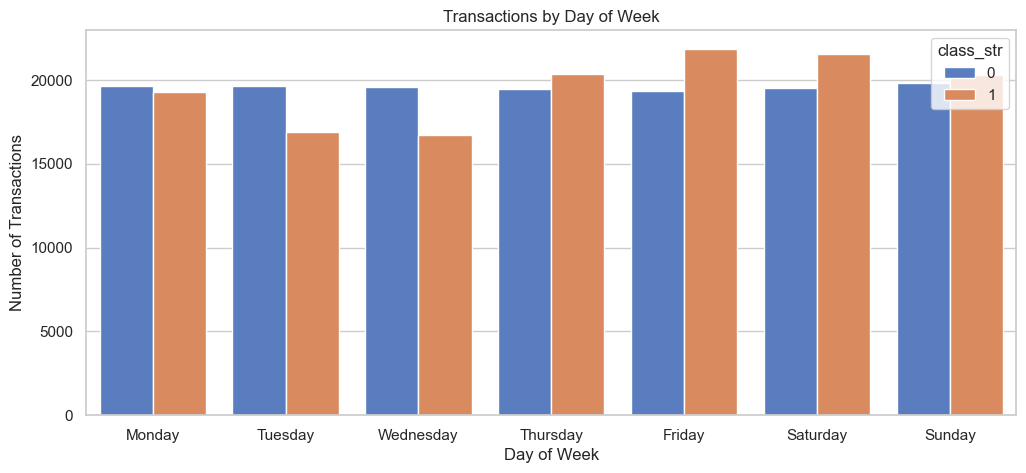

In [35]:
# If 'day_of_week' was scaled, reverse it first (replace with actual mean/std used)
day_mean = 3  # example: mean of day_of_week before scaling
day_std = 2   # example: std of day_of_week before scaling

# Restore original day_of_week
df['day_of_week_plot'] = (df['day_of_week'] * day_std + day_mean).round().astype(int)

# Clip to 0-6
df['day_of_week_plot'] = df['day_of_week_plot'].clip(0,6)

# Map numbers to weekday names
weekday_map = {0:'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday', 
               4:'Friday', 5:'Saturday', 6:'Sunday'}
df['day_of_week_plot'] = df['day_of_week_plot'].map(weekday_map)

# Plot transactions per weekday
df['class_str'] = df['class'].astype(str)
day_counts = df.groupby(['day_of_week_plot', 'class_str']).size().reset_index(name='count')

plt.figure(figsize=(12,5))
sns.barplot(data=day_counts, x='day_of_week_plot', y='count', hue='class_str',
            order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
plt.title("Transactions by Day of Week")
plt.xlabel("Day of Week")
plt.ylabel("Number of Transactions")
plt.show()


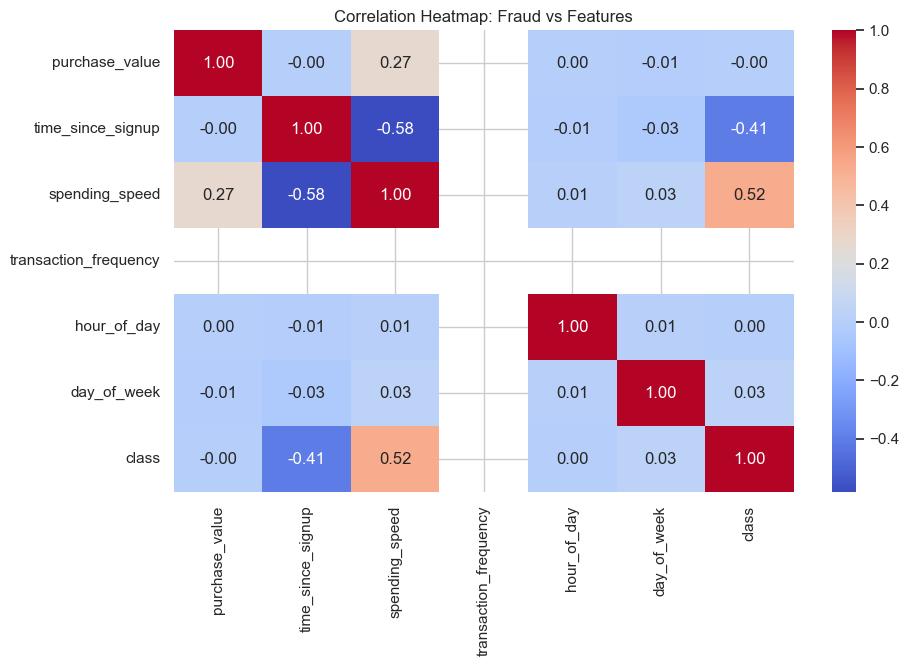

In [38]:
num_cols = ['purchase_value','time_since_signup','spending_speed','transaction_frequency','hour_of_day','day_of_week']
corr = df[num_cols + ['class']].corr()

plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap: Fraud vs Features")
plt.show()


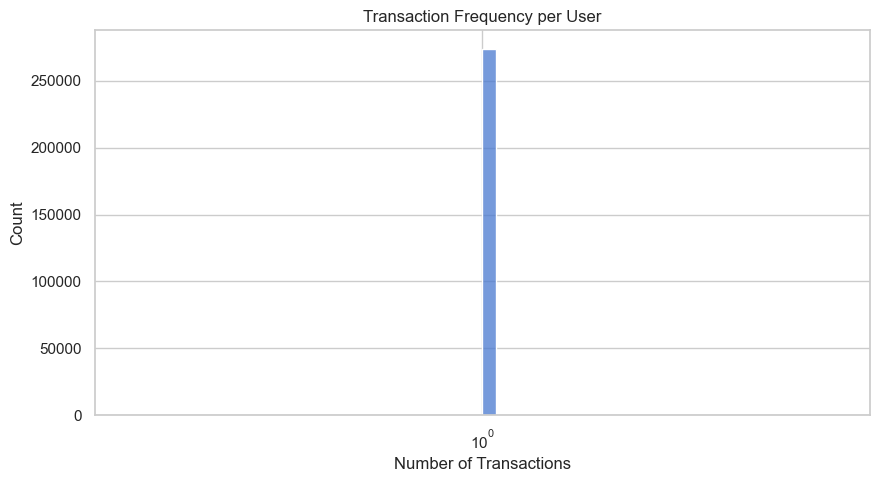

In [40]:
plt.figure(figsize=(10,5))
sns.histplot(df['transaction_frequency'], bins=50, log_scale=True)
plt.title("Transaction Frequency per User")
plt.xlabel("Number of Transactions")
plt.ylabel("Count")
plt.show()


In [45]:
import pandas as pd

# Load IP mapping
ip_country = pd.read_csv("../data/raw/IpAddress_to_Country.csv")

# Ensure integer columns
ip_country['lower_bound_ip_address'] = ip_country['lower_bound_ip_address'].astype(int)
ip_country['upper_bound_ip_address'] = ip_country['upper_bound_ip_address'].astype(int)


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ---------------------------
# Load transaction data
# ---------------------------
# Adjust path to your actual CSV location
ip_country = pd.read_csv("../data/raw/IpAddress_to_Country.csv")
# ---------------------------
# Load your transaction data
# ---------------------------
# Replace with your transaction dataset path
df = pd.read_csv(r"C:\Users\123\Desktop\Kifiya AI & ML\week 8 & 9\fraud-detection-project\data\raw\Transactions.csv")

# ---------------------------
# Check if IP column exists
# ---------------------------
if 'ip' in df.columns:
    import ipaddress
    def ip_to_int(ip_str):
        try:
            return int(ipaddress.IPv4Address(ip_str))
        except:
            return np.nan
    df['ip_address_int'] = df['ip'].apply(ip_to_int)
    df = df.dropna(subset=['ip_address_int']).astype({'ip_address_int': int})
else:
    print("No IP column found. Skipping country mapping.")
    df['country'] = 'Unknown'

# ---------------------------
# Map IP to country
# ---------------------------
ip_country['lower_bound_ip_address'] = ip_country['lower_bound_ip_address'].astype(int)
ip_country['upper_bound_ip_address'] = ip_country['upper_bound_ip_address'].astype(int)

if 'ip_address_int' in df.columns:
    ip_country = ip_country.sort_values('lower_bound_ip_address').reset_index(drop=True)
    bounds = ip_country['lower_bound_ip_address'].values
    countries = ip_country['country'].values
    upper_bounds = ip_country['upper_bound_ip_address'].values
    idx = np.searchsorted(bounds, df['ip_address_int'].values, side='right') - 1
    df['country'] = np.where(
        (idx >= 0) & (df['ip_address_int'].values <= upper_bounds[idx]),
        countries[idx],
        'Unknown'
    )

# ---------------------------
# Fraud analysis plots
# ---------------------------
df['class_str'] = df['class'].astype(str)

top_countries = df['country'].value_counts().head(20).index
country_counts = df[df['country'].isin(top_countries)].groupby(['country','class_str']).size().reset_index(name='count')

plt.figure(figsize=(14,6))
sns.barplot(data=country_counts, x='country', y='count', hue='class_str')
plt.xticks(rotation=45)
plt.title("Top 20 Countries by Transactions and Fraud")
plt.xlabel("Country")
plt.ylabel("Number of Transactions")
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\123\\Desktop\\Kifiya AI & ML\\week 8 & 9\\fraud-detection-project\\data\\raw\\Transactions.csv'